In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os


import pandas as pd
import io
import requests


Using TensorFlow backend.


In [2]:
# used function


def read_csv_798():
    data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_798)):
        if(int(data_frame_798["1.0.7"][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_798["1.0.7"][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_798['yes']=yes
    data_frame_798['no']=no
    
    print(len(data_frame_798))
    print(len(yes))
    print(len(no))
    return data_frame_798

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m


#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

#when i have delete ECG feature
def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y


#full data set one label
def x_data_y_data_create_1(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

# without ECG data set one label
def x_data_y_data_create_2(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y


#multi label data set 
def x_data_y_data_create_3(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#multi label data set without ECG
def x_data_y_data_create_4(data_set):
    actual_x = data_set[:,:len(data_set[0])-4]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#no ECG feature one label
def x_data_y_data_create_5(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

def split_data(data_set):
    # split into train and test sets
    train_size = int(len(data_set) * 0.75)
    test_size = len(data_set) - train_size   
    train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

    train_x = train[:,:len(data_set[0])-2]
    train_y = train[:,len(data_set[0])-2:]

    test_x = test[:,:len(data_set[0])-2]
    test_y = test[:,len(data_set[0])-2:]

    print(len(train), len(test))
    
    return train_x,train_y,test_x,test_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def confussion_matrix_generator(test_y,rounded_predicted_result):
    #rounded_predections = self.model.predict_classes(self.test_x,batch_size=10,verbose=0)
    cm = confusion_matrix(test_y,rounded_predicted_result)
    cm = cm
    cm_plot_labels = ['no ', 'yes']
    print(cm)
    #self.plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')
    return cm


def ROC_curve_generator(model,X_test):
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [3]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]

data_frame = []


batch_size = 30
num_classes = 2
epochs = 5

X_train =[]
Y_train =[]
X_test =[]
Y_test = []

input_size = 0

In [4]:
#data_frame = read_csv_798()

#data_frame = read_csv_834()

data_frame = pd.read_csv('data_834.tab', sep='\t')

#data_frame = read_csv_835()

In [5]:
data_frame.columns

Index(['50.0', '1.0', '0.0', '1.0.1', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '1.0.2', '0.0.5', '0.0.6', '0.0.7', '0.0.8', '1.0.3', '1.0.4'],
      dtype='object')

In [6]:
data_frame = data_frame[['50.0', '1.0', '0.0', '1.0.1', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '1.0.2', '0.0.5', '0.0.6', '0.0.7', '0.0.8', '1.0.4']]

In [7]:
data_set = create_data_set(data_frame)

In [8]:
for i in data_set:
    print(i)

[55.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[45.  2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[60.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[80.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[69.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.]
[49.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[85.  2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[28.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  0.]
[56.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.]
[58.  1.  2.  0.  0.  1.  0.  0.  1.  1.  1.  0.  0.  1.]
[40.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
[66.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.]
[30.  2.  0.  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.]
[59.  1.  2.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[42.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.]
[48.  2.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.]
[36.  2.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.]
[55.  1.  0.  

[70.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
[62.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.]
[38.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.]
[60.  2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.]
[66.  2.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.]
[57.  2.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.]
[44.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.]
[65.  2.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.]
[40.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.]
[58.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.]
[45.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[37.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[26.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.]
[52.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
[64.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.]
[48.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[45.  2.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.]
[48.  1.  0.  

[45.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  0.]
[65.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.]
[30.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[54.  2.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.]
[60.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.]
[42.  1.  2.  1.  0.  1.  0.  0.  1.  1.  0.  0.  0.  1.]
[35.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[65.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[41.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[55.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.]
[75.  1.  2.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.]
[59.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[50.  2.  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.]
[40.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[36.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.]
[64.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[40.  2.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[65.  1.  1.  

In [9]:
actual_x,actual_y = x_data_y_data_create_5(data_set)

In [10]:
len(data_set[0])

14

In [11]:
len(actual_x[0])

13

In [12]:
len(actual_y[0])

1

# 10 #losses.sparse_categorical_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 3.3082 - acc: 0.4827 - val_loss: 0.6639 - val_acc: 0.6310
Epoch 2/200
 - 0s - loss: 0.6610 - acc: 0.6027 - val_loss: 0.6472 - val_acc: 0.6786
Epoch 3/200
 - 0s - loss: 0.6560 - acc: 0.5987 - val_loss: 0.5965 - val_acc: 0.6548
Epoch 4/200
 - 0s - loss: 0.6580 - acc: 0.6013 - val_loss: 0.6150 - val_acc: 0.7024
Epoch 5/200
 - 0s - loss: 0.6519 - acc: 0.6227 - val_loss: 0.5952 - val_acc: 0.6905
Epoch 6/200
 - 0s - loss: 0.6455 - acc: 0.6067 - val_loss: 0.6070 - val_acc: 0.6786
Epoch 7/200
 - 0s - loss: 0.6404 - acc: 0.6293 - val_loss: 0.5770 - val_acc: 0.7024
Epoch 8/200
 - 0s - loss: 0.6399 - acc: 0.6520 - val_loss: 0.5702 - val_acc: 0.6667
Epoch 9/200
 - 0s - loss: 0.6340 - acc: 0.6227 - val_loss: 0.6213 - val_acc: 0.7262
Epoch 10/200
 - 0s - loss: 0.6350 - acc: 0.6493 - val_loss: 0.5837 - val_acc: 0.7381
Epoch 11/200
 - 0s - loss: 0.6319 - acc: 0.6560 - val_loss: 0.6125 - val_acc: 0.7262
Epoch 12/200
 - 0s - 

Epoch 97/200
 - 0s - loss: 0.5904 - acc: 0.7013 - val_loss: 0.6026 - val_acc: 0.7024
Epoch 98/200
 - 0s - loss: 0.5941 - acc: 0.6907 - val_loss: 0.5196 - val_acc: 0.7738
Epoch 99/200
 - 0s - loss: 0.5920 - acc: 0.7040 - val_loss: 0.5336 - val_acc: 0.7143
Epoch 100/200
 - 0s - loss: 0.5877 - acc: 0.7293 - val_loss: 0.5321 - val_acc: 0.7143
Epoch 101/200
 - 0s - loss: 0.5875 - acc: 0.7120 - val_loss: 0.5221 - val_acc: 0.7619
Epoch 102/200
 - 0s - loss: 0.5830 - acc: 0.7200 - val_loss: 0.5313 - val_acc: 0.7143
Epoch 103/200
 - 0s - loss: 0.5845 - acc: 0.7213 - val_loss: 0.5360 - val_acc: 0.7262
Epoch 104/200
 - 0s - loss: 0.5849 - acc: 0.7080 - val_loss: 0.5181 - val_acc: 0.7143
Epoch 105/200
 - 0s - loss: 0.5845 - acc: 0.7160 - val_loss: 0.5144 - val_acc: 0.7262
Epoch 106/200
 - 0s - loss: 0.5862 - acc: 0.7160 - val_loss: 0.5307 - val_acc: 0.7143
Epoch 107/200
 - 0s - loss: 0.6047 - acc: 0.6960 - val_loss: 0.5515 - val_acc: 0.7143
Epoch 108/200
 - 0s - loss: 0.5807 - acc: 0.7093 - val_lo

Epoch 193/200
 - 0s - loss: 0.5775 - acc: 0.7213 - val_loss: 0.5430 - val_acc: 0.7143
Epoch 194/200
 - 0s - loss: 0.5805 - acc: 0.7067 - val_loss: 0.5346 - val_acc: 0.7143
Epoch 195/200
 - 0s - loss: 0.5788 - acc: 0.7160 - val_loss: 0.5344 - val_acc: 0.7262
Epoch 196/200
 - 0s - loss: 0.5782 - acc: 0.7173 - val_loss: 0.5375 - val_acc: 0.7262
Epoch 197/200
 - 0s - loss: 0.5794 - acc: 0.7147 - val_loss: 0.5282 - val_acc: 0.7262
Epoch 198/200
 - 0s - loss: 0.5798 - acc: 0.7253 - val_loss: 0.5340 - val_acc: 0.7381
Epoch 199/200
 - 0s - loss: 0.5747 - acc: 0.7093 - val_loss: 0.5189 - val_acc: 0.7262
Epoch 200/200
 - 0s - loss: 0.5833 - acc: 0.7133 - val_loss: 0.5285 - val_acc: 0.7381


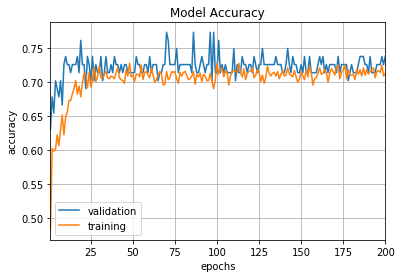

84/84 [==============================] - 0s 54us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.5285170731090364, 0.7380952324186053]
 best Score: 0.7380952324186053          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.9060 - acc: 0.5960 - val_loss: 0.6447 - val_acc: 0.6429
Epoch 2/200
 - 0s - loss: 0.6588 - acc: 0.5947 - val_loss: 0.6261 - val_acc: 0.6548
Epoch 3/200
 - 0s - loss: 0.6579 - acc: 0.5933 - val_loss: 0.6243 - val_acc: 0.6548
Epoch 4/200
 - 0s - loss: 0.6564 - acc: 0.6000 - val_loss: 0.6413 - val_acc: 0.6548
Epoch 5/200
 - 0s - loss: 0.6545 - acc: 0.5960 - val_loss: 0.6210 - val_acc: 0.6548
Epoch 6/200
 - 0s - loss: 0.6528 - acc: 0.6080 - val_loss: 0.6196 - val_acc: 0.6548
Epoch 7/200
 - 0s - loss: 0.6533 - acc: 0.6067 - val_loss: 0.6279 - val_acc: 0.6548
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5790 - acc: 0.7280 - val_loss: 0.6168 - val_acc: 0.6667
Epoch 94/200
 - 0s - loss: 0.5799 - acc: 0.7187 - val_loss: 0.6247 - val_acc: 0.6548
Epoch 95/200
 - 0s - loss: 0.5820 - acc: 0.7213 - val_loss: 0.5984 - val_acc: 0.7143
Epoch 96/200
 - 0s - loss: 0.5762 - acc: 0.7280 - val_loss: 0.6087 - val_acc: 0.6548
Epoch 97/200
 - 0s - loss: 0.5802 - acc: 0.7120 - val_loss: 0.5932 - val_acc: 0.7024
Epoch 98/200
 - 0s - loss: 0.5773 - acc: 0.7253 - val_loss: 0.6078 - val_acc: 0.6667
Epoch 99/200
 - 0s - loss: 0.5798 - acc: 0.7267 - val_loss: 0.5908 - val_acc: 0.7143
Epoch 100/200
 - 0s - loss: 0.5802 - acc: 0.7147 - val_loss: 0.5905 - val_acc: 0.7262
Epoch 101/200
 - 0s - loss: 0.5778 - acc: 0.7253 - val_loss: 0.6091 - val_acc: 0.6548
Epoch 102/200
 - 0s - loss: 0.5778 - acc: 0.7280 - val_loss: 0.5912 - val_acc: 0.7262
Epoch 103/200
 - 0s - loss: 0.5794 - acc: 0.7107 - val_loss: 0.6166 - val_acc: 0.6548
Epoch 104/200
 - 0s - loss: 0.5768 - acc: 0.7213 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5735 - acc: 0.7267 - val_loss: 0.6166 - val_acc: 0.6667
Epoch 190/200
 - 0s - loss: 0.5723 - acc: 0.7200 - val_loss: 0.6016 - val_acc: 0.6905
Epoch 191/200
 - 0s - loss: 0.5714 - acc: 0.7227 - val_loss: 0.6119 - val_acc: 0.6786
Epoch 192/200
 - 0s - loss: 0.5712 - acc: 0.7293 - val_loss: 0.6389 - val_acc: 0.6190
Epoch 193/200
 - 0s - loss: 0.5755 - acc: 0.7187 - val_loss: 0.6107 - val_acc: 0.6667
Epoch 194/200
 - 0s - loss: 0.5719 - acc: 0.7200 - val_loss: 0.5986 - val_acc: 0.7143
Epoch 195/200
 - 0s - loss: 0.5726 - acc: 0.7267 - val_loss: 0.6091 - val_acc: 0.6905
Epoch 196/200
 - 0s - loss: 0.5736 - acc: 0.7147 - val_loss: 0.5960 - val_acc: 0.7143
Epoch 197/200
 - 0s - loss: 0.5779 - acc: 0.7253 - val_loss: 0.5984 - val_acc: 0.7143
Epoch 198/200
 - 0s - loss: 0.5725 - acc: 0.7320 - val_loss: 0.6024 - val_acc: 0.6905
Epoch 199/200
 - 0s - loss: 0.5707 - acc: 0.7227 - val_loss: 0.5954 - val_acc: 0.7262
Epoch 200/200
 - 0s - loss: 0.5774 - acc: 0.7240 - val

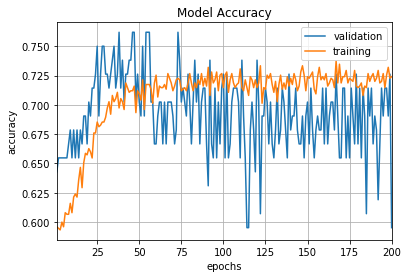

84/84 [==============================] - 0s 57us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6546908106122699, 0.5952380923997789]
 best Score: 0.7380952324186053          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.7897 - acc: 0.6027 - val_loss: 0.6633 - val_acc: 0.5952
Epoch 2/200
 - 0s - loss: 0.6626 - acc: 0.6027 - val_loss: 0.6691 - val_acc: 0.5952
Epoch 3/200
 - 0s - loss: 0.6685 - acc: 0.6027 - val_loss: 0.6640 - val_acc: 0.5952
Epoch 4/200
 - 0s - loss: 0.6638 - acc: 0.6040 - val_loss: 0.6627 - val_acc: 0.5952
Epoch 5/200
 - 0s - loss: 0.6617 - acc: 0.6040 - val_loss: 0.6611 - val_acc: 0.5952
Epoch 6/200
 - 0s - loss: 0.6617 - acc: 0.6000 - val_loss: 0.6609 - val_acc: 0.5952
Epoch 7/200
 - 0s - loss: 0.6616 - acc: 0.6053 - val_loss: 0.6647 - val_acc: 0.6548
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5729 - acc: 0.7213 - val_loss: 0.6074 - val_acc: 0.6667
Epoch 94/200
 - 0s - loss: 0.5720 - acc: 0.7267 - val_loss: 0.6162 - val_acc: 0.6548
Epoch 95/200
 - 0s - loss: 0.5744 - acc: 0.7093 - val_loss: 0.6086 - val_acc: 0.6786
Epoch 96/200
 - 0s - loss: 0.5737 - acc: 0.7320 - val_loss: 0.6095 - val_acc: 0.6548
Epoch 97/200
 - 0s - loss: 0.5711 - acc: 0.7187 - val_loss: 0.6074 - val_acc: 0.6786
Epoch 98/200
 - 0s - loss: 0.5716 - acc: 0.7147 - val_loss: 0.6076 - val_acc: 0.6548
Epoch 99/200
 - 0s - loss: 0.5733 - acc: 0.7200 - val_loss: 0.6090 - val_acc: 0.6667
Epoch 100/200
 - 0s - loss: 0.5714 - acc: 0.7160 - val_loss: 0.6087 - val_acc: 0.6667
Epoch 101/200
 - 0s - loss: 0.5700 - acc: 0.7227 - val_loss: 0.6087 - val_acc: 0.6667
Epoch 102/200
 - 0s - loss: 0.5690 - acc: 0.7227 - val_loss: 0.6103 - val_acc: 0.6548
Epoch 103/200
 - 0s - loss: 0.5708 - acc: 0.7200 - val_loss: 0.6091 - val_acc: 0.6786
Epoch 104/200
 - 0s - loss: 0.5704 - acc: 0.7187 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5635 - acc: 0.7293 - val_loss: 0.6196 - val_acc: 0.6667
Epoch 190/200
 - 0s - loss: 0.5630 - acc: 0.7267 - val_loss: 0.6241 - val_acc: 0.6667
Epoch 191/200
 - 0s - loss: 0.5607 - acc: 0.7293 - val_loss: 0.6195 - val_acc: 0.6667
Epoch 192/200
 - 0s - loss: 0.5604 - acc: 0.7280 - val_loss: 0.6237 - val_acc: 0.6667
Epoch 193/200
 - 0s - loss: 0.5607 - acc: 0.7347 - val_loss: 0.6195 - val_acc: 0.6667
Epoch 194/200
 - 0s - loss: 0.5633 - acc: 0.7253 - val_loss: 0.6196 - val_acc: 0.6667
Epoch 195/200
 - 0s - loss: 0.5606 - acc: 0.7253 - val_loss: 0.6194 - val_acc: 0.6667
Epoch 196/200
 - 0s - loss: 0.5660 - acc: 0.7200 - val_loss: 0.6202 - val_acc: 0.6786
Epoch 197/200
 - 0s - loss: 0.5628 - acc: 0.7293 - val_loss: 0.6196 - val_acc: 0.6548
Epoch 198/200
 - 0s - loss: 0.5606 - acc: 0.7320 - val_loss: 0.6215 - val_acc: 0.6667
Epoch 199/200
 - 0s - loss: 0.5622 - acc: 0.7347 - val_loss: 0.6259 - val_acc: 0.6786
Epoch 200/200
 - 0s - loss: 0.5617 - acc: 0.7213 - val

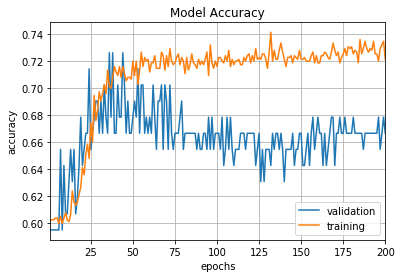

84/84 [==============================] - 0s 119us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.6219150395620436, 0.6666666666666666]
 best Score: 0.7380952324186053          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 2.2696 - acc: 0.5280 - val_loss: 0.7224 - val_acc: 0.4643
Epoch 2/200
 - 0s - loss: 0.6489 - acc: 0.6320 - val_loss: 0.6983 - val_acc: 0.5238
Epoch 3/200
 - 0s - loss: 0.6483 - acc: 0.6347 - val_loss: 0.7153 - val_acc: 0.4643
Epoch 4/200
 - 0s - loss: 0.6434 - acc: 0.6507 - val_loss: 0.7336 - val_acc: 0.4643
Epoch 5/200
 - 0s - loss: 0.6386 - acc: 0.6333 - val_loss: 0.7075 - val_acc: 0.4762
Epoch 6/200
 - 0s - loss: 0.6400 - acc: 0.6480 - val_loss: 0.6875 - val_acc: 0.5238
Epoch 7/200
 - 0s - loss: 0.6343 - acc: 0.6440 - val_loss: 0.7376 - val_acc: 0.4643
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5740 - acc: 0.7213 - val_loss: 0.6064 - val_acc: 0.6905
Epoch 94/200
 - 0s - loss: 0.5742 - acc: 0.7173 - val_loss: 0.5736 - val_acc: 0.7500
Epoch 95/200
 - 0s - loss: 0.5712 - acc: 0.7227 - val_loss: 0.5744 - val_acc: 0.7381
Epoch 96/200
 - 0s - loss: 0.5709 - acc: 0.7187 - val_loss: 0.6753 - val_acc: 0.5952
Epoch 97/200
 - 0s - loss: 0.5794 - acc: 0.7160 - val_loss: 0.5982 - val_acc: 0.7381
Epoch 98/200
 - 0s - loss: 0.5750 - acc: 0.7133 - val_loss: 0.5815 - val_acc: 0.7262
Epoch 99/200
 - 0s - loss: 0.5752 - acc: 0.7280 - val_loss: 0.6137 - val_acc: 0.6786
Epoch 100/200
 - 0s - loss: 0.5779 - acc: 0.7120 - val_loss: 0.5858 - val_acc: 0.7143
Epoch 101/200
 - 0s - loss: 0.5743 - acc: 0.7173 - val_loss: 0.5819 - val_acc: 0.7262
Epoch 102/200
 - 0s - loss: 0.5784 - acc: 0.7120 - val_loss: 0.5809 - val_acc: 0.7262
Epoch 103/200
 - 0s - loss: 0.5721 - acc: 0.7160 - val_loss: 0.6217 - val_acc: 0.6548
Epoch 104/200
 - 0s - loss: 0.5800 - acc: 0.7187 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5722 - acc: 0.7160 - val_loss: 0.6004 - val_acc: 0.7143
Epoch 190/200
 - 0s - loss: 0.5670 - acc: 0.7173 - val_loss: 0.5948 - val_acc: 0.7024
Epoch 191/200
 - 0s - loss: 0.5692 - acc: 0.7147 - val_loss: 0.5682 - val_acc: 0.7857
Epoch 192/200
 - 0s - loss: 0.5728 - acc: 0.7147 - val_loss: 0.6017 - val_acc: 0.7143
Epoch 193/200
 - 0s - loss: 0.5694 - acc: 0.7147 - val_loss: 0.5806 - val_acc: 0.7143
Epoch 194/200
 - 0s - loss: 0.5729 - acc: 0.7107 - val_loss: 0.6002 - val_acc: 0.7143
Epoch 195/200
 - 0s - loss: 0.5696 - acc: 0.7040 - val_loss: 0.5756 - val_acc: 0.7262
Epoch 196/200
 - 0s - loss: 0.5694 - acc: 0.7200 - val_loss: 0.5960 - val_acc: 0.7024
Epoch 197/200
 - 0s - loss: 0.5706 - acc: 0.7160 - val_loss: 0.5839 - val_acc: 0.7024
Epoch 198/200
 - 0s - loss: 0.5695 - acc: 0.7120 - val_loss: 0.6824 - val_acc: 0.5952
Epoch 199/200
 - 0s - loss: 0.5740 - acc: 0.7093 - val_loss: 0.6144 - val_acc: 0.6548
Epoch 200/200
 - 0s - loss: 0.5696 - acc: 0.7173 - val

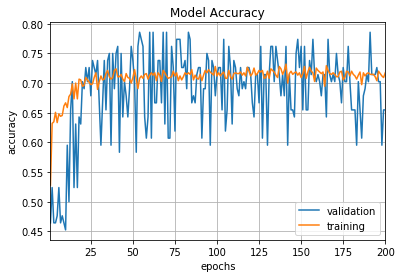

84/84 [==============================] - 0s 72us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6125593242191133, 0.6547619104385376]
 best Score: 0.7380952324186053          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 4.8081 - acc: 0.5979 - val_loss: 2.3295 - val_acc: 0.6386
Epoch 2/200
 - 0s - loss: 1.3792 - acc: 0.5979 - val_loss: 0.6635 - val_acc: 0.6386
Epoch 3/200
 - 0s - loss: 0.6654 - acc: 0.6165 - val_loss: 0.6280 - val_acc: 0.6265
Epoch 4/200
 - 0s - loss: 0.6556 - acc: 0.6152 - val_loss: 0.6262 - val_acc: 0.6265
Epoch 5/200
 - 0s - loss: 0.6547 - acc: 0.6205 - val_loss: 0.6289 - val_acc: 0.6386
Epoch 6/200
 - 0s - loss: 0.6531 - acc: 0.6258 - val_loss: 0.6269 - val_acc: 0.6265
Epoch 7/200
 - 0s - loss: 0.6517 - acc: 0.6205 - val_loss: 0.6254 - val_acc: 0.6265
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5748 - acc: 0.7164 - val_loss: 0.5806 - val_acc: 0.7349
Epoch 94/200
 - 0s - loss: 0.5751 - acc: 0.7137 - val_loss: 0.5877 - val_acc: 0.7229
Epoch 95/200
 - 0s - loss: 0.5789 - acc: 0.7150 - val_loss: 0.5805 - val_acc: 0.7470
Epoch 96/200
 - 0s - loss: 0.5763 - acc: 0.7164 - val_loss: 0.5804 - val_acc: 0.7349
Epoch 97/200
 - 0s - loss: 0.5754 - acc: 0.7150 - val_loss: 0.5799 - val_acc: 0.7349
Epoch 98/200
 - 0s - loss: 0.5746 - acc: 0.7111 - val_loss: 0.5795 - val_acc: 0.7349
Epoch 99/200
 - 0s - loss: 0.5740 - acc: 0.7150 - val_loss: 0.5962 - val_acc: 0.6747
Epoch 100/200
 - 0s - loss: 0.5794 - acc: 0.6991 - val_loss: 0.5801 - val_acc: 0.7229
Epoch 101/200
 - 0s - loss: 0.5779 - acc: 0.7111 - val_loss: 0.5798 - val_acc: 0.7349
Epoch 102/200
 - 0s - loss: 0.5800 - acc: 0.7124 - val_loss: 0.5851 - val_acc: 0.6747
Epoch 103/200
 - 0s - loss: 0.5748 - acc: 0.7204 - val_loss: 0.5808 - val_acc: 0.7108
Epoch 104/200
 - 0s - loss: 0.5723 - acc: 0.7150 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5707 - acc: 0.7124 - val_loss: 0.5912 - val_acc: 0.7349
Epoch 190/200
 - 0s - loss: 0.5714 - acc: 0.7204 - val_loss: 0.5887 - val_acc: 0.7229
Epoch 191/200
 - 0s - loss: 0.5720 - acc: 0.7084 - val_loss: 0.5878 - val_acc: 0.7229
Epoch 192/200
 - 0s - loss: 0.5695 - acc: 0.7270 - val_loss: 0.5872 - val_acc: 0.7229
Epoch 193/200
 - 0s - loss: 0.5699 - acc: 0.7150 - val_loss: 0.5914 - val_acc: 0.6867
Epoch 194/200
 - 0s - loss: 0.5689 - acc: 0.7150 - val_loss: 0.5878 - val_acc: 0.7229
Epoch 195/200
 - 0s - loss: 0.5703 - acc: 0.7164 - val_loss: 0.5895 - val_acc: 0.6867
Epoch 196/200
 - 0s - loss: 0.5713 - acc: 0.7217 - val_loss: 0.5874 - val_acc: 0.7108
Epoch 197/200
 - 0s - loss: 0.5699 - acc: 0.7190 - val_loss: 0.5861 - val_acc: 0.7229
Epoch 198/200
 - 0s - loss: 0.5718 - acc: 0.7124 - val_loss: 0.5884 - val_acc: 0.7229
Epoch 199/200
 - 0s - loss: 0.5737 - acc: 0.7137 - val_loss: 0.5886 - val_acc: 0.7470
Epoch 200/200
 - 0s - loss: 0.5697 - acc: 0.7204 - val

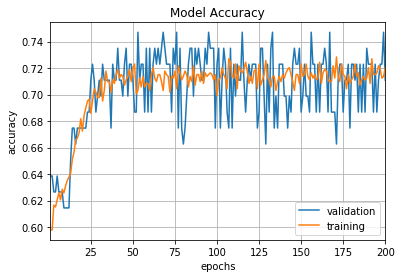

83/83 [==============================] - 0s 65us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5869242688977575, 0.7108433749302324]
 best Score: 0.7380952324186053          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7526 - acc: 0.5326 - val_loss: 0.6562 - val_acc: 0.6145
Epoch 2/200
 - 0s - loss: 0.6682 - acc: 0.5952 - val_loss: 0.6645 - val_acc: 0.6265
Epoch 3/200
 - 0s - loss: 0.6688 - acc: 0.5979 - val_loss: 0.6576 - val_acc: 0.6145
Epoch 4/200
 - 0s - loss: 0.6653 - acc: 0.5885 - val_loss: 0.6589 - val_acc: 0.6145
Epoch 5/200
 - 0s - loss: 0.6621 - acc: 0.6085 - val_loss: 0.6518 - val_acc: 0.6145
Epoch 6/200
 - 0s - loss: 0.6607 - acc: 0.6059 - val_loss: 0.6469 - val_acc: 0.6024
Epoch 7/200
 - 0s - loss: 0.6622 - acc: 0.6112 - val_loss: 0.6501 - val_acc: 0.6024
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5602 - acc: 0.7297 - val_loss: 0.6939 - val_acc: 0.6506
Epoch 94/200
 - 0s - loss: 0.5637 - acc: 0.7217 - val_loss: 0.6942 - val_acc: 0.6386
Epoch 95/200
 - 0s - loss: 0.5618 - acc: 0.7284 - val_loss: 0.6948 - val_acc: 0.6506
Epoch 96/200
 - 0s - loss: 0.5639 - acc: 0.7177 - val_loss: 0.6918 - val_acc: 0.6386
Epoch 97/200
 - 0s - loss: 0.5630 - acc: 0.7217 - val_loss: 0.6931 - val_acc: 0.6627
Epoch 98/200
 - 0s - loss: 0.5612 - acc: 0.7297 - val_loss: 0.6932 - val_acc: 0.6506
Epoch 99/200
 - 0s - loss: 0.5586 - acc: 0.7403 - val_loss: 0.6939 - val_acc: 0.6506
Epoch 100/200
 - 0s - loss: 0.5625 - acc: 0.7244 - val_loss: 0.6947 - val_acc: 0.6506
Epoch 101/200
 - 0s - loss: 0.5639 - acc: 0.7204 - val_loss: 0.6911 - val_acc: 0.6506
Epoch 102/200
 - 0s - loss: 0.5590 - acc: 0.7190 - val_loss: 0.6926 - val_acc: 0.6506
Epoch 103/200
 - 0s - loss: 0.5598 - acc: 0.7217 - val_loss: 0.6974 - val_acc: 0.6506
Epoch 104/200
 - 0s - loss: 0.5638 - acc: 0.7244 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5582 - acc: 0.7310 - val_loss: 0.6931 - val_acc: 0.6506
Epoch 190/200
 - 0s - loss: 0.5615 - acc: 0.7230 - val_loss: 0.6922 - val_acc: 0.6506
Epoch 191/200
 - 0s - loss: 0.5564 - acc: 0.7244 - val_loss: 0.7001 - val_acc: 0.6265
Epoch 192/200
 - 0s - loss: 0.5614 - acc: 0.7124 - val_loss: 0.6921 - val_acc: 0.6506
Epoch 193/200
 - 0s - loss: 0.5586 - acc: 0.7310 - val_loss: 0.6946 - val_acc: 0.6506
Epoch 194/200
 - 0s - loss: 0.5587 - acc: 0.7190 - val_loss: 0.6925 - val_acc: 0.6386
Epoch 195/200
 - 0s - loss: 0.5598 - acc: 0.7190 - val_loss: 0.6950 - val_acc: 0.6506
Epoch 196/200
 - 0s - loss: 0.5592 - acc: 0.7217 - val_loss: 0.6927 - val_acc: 0.6506
Epoch 197/200
 - 0s - loss: 0.5648 - acc: 0.7217 - val_loss: 0.6926 - val_acc: 0.6506
Epoch 198/200
 - 0s - loss: 0.5616 - acc: 0.7190 - val_loss: 0.6931 - val_acc: 0.6506
Epoch 199/200
 - 0s - loss: 0.5594 - acc: 0.7270 - val_loss: 0.6935 - val_acc: 0.6506
Epoch 200/200
 - 0s - loss: 0.5596 - acc: 0.7257 - val

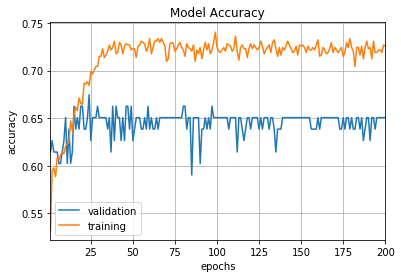

83/83 [==============================] - 0s 63us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6934708119874977, 0.6506024038935282]
 best Score: 0.7380952324186053          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.6727 - acc: 0.5792 - val_loss: 0.6315 - val_acc: 0.6627
Epoch 2/200
 - 0s - loss: 0.6682 - acc: 0.5952 - val_loss: 0.6316 - val_acc: 0.6627
Epoch 3/200
 - 0s - loss: 0.6624 - acc: 0.5952 - val_loss: 0.6497 - val_acc: 0.6627
Epoch 4/200
 - 0s - loss: 0.6644 - acc: 0.5952 - val_loss: 0.6204 - val_acc: 0.6627
Epoch 5/200
 - 0s - loss: 0.6622 - acc: 0.5952 - val_loss: 0.6246 - val_acc: 0.6627
Epoch 6/200
 - 0s - loss: 0.6576 - acc: 0.5952 - val_loss: 0.6236 - val_acc: 0.6627
Epoch 7/200
 - 0s - loss: 0.6570 - acc: 0.5965 - val_loss: 0.6189 - val_acc: 0.6627
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5760 - acc: 0.7071 - val_loss: 0.5574 - val_acc: 0.7229
Epoch 94/200
 - 0s - loss: 0.5779 - acc: 0.7190 - val_loss: 0.5570 - val_acc: 0.7229
Epoch 95/200
 - 0s - loss: 0.5757 - acc: 0.7164 - val_loss: 0.5458 - val_acc: 0.7470
Epoch 96/200
 - 0s - loss: 0.5806 - acc: 0.7097 - val_loss: 0.5500 - val_acc: 0.7711
Epoch 97/200
 - 0s - loss: 0.5753 - acc: 0.7217 - val_loss: 0.5552 - val_acc: 0.7229
Epoch 98/200
 - 0s - loss: 0.5782 - acc: 0.7111 - val_loss: 0.5496 - val_acc: 0.7470
Epoch 99/200
 - 0s - loss: 0.5766 - acc: 0.7137 - val_loss: 0.5519 - val_acc: 0.7470
Epoch 100/200
 - 0s - loss: 0.5765 - acc: 0.7164 - val_loss: 0.5563 - val_acc: 0.7952
Epoch 101/200
 - 0s - loss: 0.5766 - acc: 0.7071 - val_loss: 0.5490 - val_acc: 0.7470
Epoch 102/200
 - 0s - loss: 0.5751 - acc: 0.7217 - val_loss: 0.5529 - val_acc: 0.7831
Epoch 103/200
 - 0s - loss: 0.5831 - acc: 0.7044 - val_loss: 0.5514 - val_acc: 0.7952
Epoch 104/200
 - 0s - loss: 0.5824 - acc: 0.7084 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5729 - acc: 0.7177 - val_loss: 0.5537 - val_acc: 0.7590
Epoch 190/200
 - 0s - loss: 0.5759 - acc: 0.7017 - val_loss: 0.5607 - val_acc: 0.7470
Epoch 191/200
 - 0s - loss: 0.5774 - acc: 0.7177 - val_loss: 0.5493 - val_acc: 0.7711
Epoch 192/200
 - 0s - loss: 0.5728 - acc: 0.7164 - val_loss: 0.5537 - val_acc: 0.7349
Epoch 193/200
 - 0s - loss: 0.5722 - acc: 0.7177 - val_loss: 0.5602 - val_acc: 0.7349
Epoch 194/200
 - 0s - loss: 0.5721 - acc: 0.7270 - val_loss: 0.5631 - val_acc: 0.7349
Epoch 195/200
 - 0s - loss: 0.5708 - acc: 0.7217 - val_loss: 0.5529 - val_acc: 0.7470
Epoch 196/200
 - 0s - loss: 0.5760 - acc: 0.7044 - val_loss: 0.5511 - val_acc: 0.7229
Epoch 197/200
 - 0s - loss: 0.5736 - acc: 0.7057 - val_loss: 0.5485 - val_acc: 0.7711
Epoch 198/200
 - 0s - loss: 0.5782 - acc: 0.7111 - val_loss: 0.5497 - val_acc: 0.7349
Epoch 199/200
 - 0s - loss: 0.5734 - acc: 0.7111 - val_loss: 0.5508 - val_acc: 0.7711
Epoch 200/200
 - 0s - loss: 0.5715 - acc: 0.7150 - val

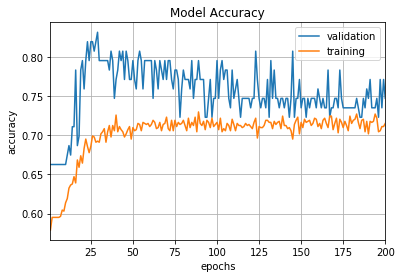

83/83 [==============================] - 0s 148us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.555686090725014, 0.7469879582703832]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.6825 - acc: 0.6125 - val_loss: 0.6997 - val_acc: 0.5060
Epoch 2/200
 - 0s - loss: 0.6557 - acc: 0.6125 - val_loss: 0.7210 - val_acc: 0.5060
Epoch 3/200
 - 0s - loss: 0.6562 - acc: 0.6125 - val_loss: 0.7150 - val_acc: 0.5060
Epoch 4/200
 - 0s - loss: 0.6542 - acc: 0.6125 - val_loss: 0.7308 - val_acc: 0.5060
Epoch 5/200
 - 0s - loss: 0.6527 - acc: 0.6125 - val_loss: 0.7117 - val_acc: 0.5060
Epoch 6/200
 - 0s - loss: 0.6518 - acc: 0.6125 - val_loss: 0.7048 - val_acc: 0.5060
Epoch 7/200
 - 0s - loss: 0.6513 - acc: 0.6125 - val_loss: 0.7085 - val_acc: 0.5060
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.5921 - acc: 0.7164 - val_loss: 0.6329 - val_acc: 0.6386
Epoch 94/200
 - 0s - loss: 0.5912 - acc: 0.7164 - val_loss: 0.6199 - val_acc: 0.6386
Epoch 95/200
 - 0s - loss: 0.5898 - acc: 0.7071 - val_loss: 0.6199 - val_acc: 0.6506
Epoch 96/200
 - 0s - loss: 0.5889 - acc: 0.7084 - val_loss: 0.6111 - val_acc: 0.6386
Epoch 97/200
 - 0s - loss: 0.5885 - acc: 0.7204 - val_loss: 0.6137 - val_acc: 0.6386
Epoch 98/200
 - 0s - loss: 0.5875 - acc: 0.7150 - val_loss: 0.6050 - val_acc: 0.6386
Epoch 99/200
 - 0s - loss: 0.5891 - acc: 0.7257 - val_loss: 0.6081 - val_acc: 0.6386
Epoch 100/200
 - 0s - loss: 0.5865 - acc: 0.7257 - val_loss: 0.6096 - val_acc: 0.6386
Epoch 101/200
 - 0s - loss: 0.5879 - acc: 0.7270 - val_loss: 0.6094 - val_acc: 0.6386
Epoch 102/200
 - 0s - loss: 0.5853 - acc: 0.7270 - val_loss: 0.6050 - val_acc: 0.6506
Epoch 103/200
 - 0s - loss: 0.5853 - acc: 0.7257 - val_loss: 0.6096 - val_acc: 0.6506
Epoch 104/200
 - 0s - loss: 0.5843 - acc: 0.7270 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5759 - acc: 0.7297 - val_loss: 0.5872 - val_acc: 0.6386
Epoch 190/200
 - 0s - loss: 0.5761 - acc: 0.7270 - val_loss: 0.5864 - val_acc: 0.6506
Epoch 191/200
 - 0s - loss: 0.5763 - acc: 0.7337 - val_loss: 0.5902 - val_acc: 0.6506
Epoch 192/200
 - 0s - loss: 0.5763 - acc: 0.7270 - val_loss: 0.5937 - val_acc: 0.6506
Epoch 193/200
 - 0s - loss: 0.5765 - acc: 0.7310 - val_loss: 0.5929 - val_acc: 0.6506
Epoch 194/200
 - 0s - loss: 0.5769 - acc: 0.7297 - val_loss: 0.5913 - val_acc: 0.6506
Epoch 195/200
 - 0s - loss: 0.5760 - acc: 0.7257 - val_loss: 0.5912 - val_acc: 0.6506
Epoch 196/200
 - 0s - loss: 0.5764 - acc: 0.7337 - val_loss: 0.5926 - val_acc: 0.6506
Epoch 197/200
 - 0s - loss: 0.5754 - acc: 0.7377 - val_loss: 0.5838 - val_acc: 0.6506
Epoch 198/200
 - 0s - loss: 0.5765 - acc: 0.7297 - val_loss: 0.5905 - val_acc: 0.6506
Epoch 199/200
 - 0s - loss: 0.5762 - acc: 0.7337 - val_loss: 0.5891 - val_acc: 0.6506
Epoch 200/200
 - 0s - loss: 0.5763 - acc: 0.7297 - val

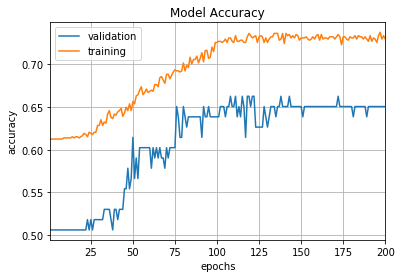

83/83 [==============================] - 0s 290us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5858443020338036, 0.6506024125110672]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 2s - loss: 0.6552 - acc: 0.6245 - val_loss: 0.6540 - val_acc: 0.5783
Epoch 2/200
 - 0s - loss: 0.6515 - acc: 0.6165 - val_loss: 0.6398 - val_acc: 0.6024
Epoch 3/200
 - 0s - loss: 0.6440 - acc: 0.6125 - val_loss: 0.6529 - val_acc: 0.6506
Epoch 4/200
 - 0s - loss: 0.6355 - acc: 0.6365 - val_loss: 0.6363 - val_acc: 0.5783
Epoch 5/200
 - 0s - loss: 0.6332 - acc: 0.6511 - val_loss: 0.6287 - val_acc: 0.5904
Epoch 6/200
 - 0s - loss: 0.6327 - acc: 0.6618 - val_loss: 0.6215 - val_acc: 0.6265
Epoch 7/200
 - 0s - loss: 0.6261 - acc: 0.6764 - val_loss: 0.6180 - val_acc: 0.6265
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.5728 - acc: 0.7177 - val_loss: 0.5615 - val_acc: 0.7229
Epoch 94/200
 - 0s - loss: 0.5729 - acc: 0.7150 - val_loss: 0.5609 - val_acc: 0.7229
Epoch 95/200
 - 0s - loss: 0.5732 - acc: 0.7270 - val_loss: 0.5689 - val_acc: 0.7229
Epoch 96/200
 - 0s - loss: 0.5778 - acc: 0.7097 - val_loss: 0.5598 - val_acc: 0.7470
Epoch 97/200
 - 0s - loss: 0.5733 - acc: 0.7230 - val_loss: 0.5613 - val_acc: 0.7470
Epoch 98/200
 - 0s - loss: 0.5693 - acc: 0.7190 - val_loss: 0.5728 - val_acc: 0.7229
Epoch 99/200
 - 0s - loss: 0.5714 - acc: 0.7217 - val_loss: 0.5660 - val_acc: 0.6988
Epoch 100/200
 - 0s - loss: 0.5737 - acc: 0.7244 - val_loss: 0.5692 - val_acc: 0.7108
Epoch 101/200
 - 0s - loss: 0.5704 - acc: 0.7217 - val_loss: 0.5642 - val_acc: 0.7229
Epoch 102/200
 - 0s - loss: 0.5717 - acc: 0.7230 - val_loss: 0.5692 - val_acc: 0.7108
Epoch 103/200
 - 0s - loss: 0.5705 - acc: 0.7230 - val_loss: 0.5678 - val_acc: 0.7108
Epoch 104/200
 - 0s - loss: 0.5701 - acc: 0.7257 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5718 - acc: 0.7230 - val_loss: 0.5730 - val_acc: 0.7229
Epoch 190/200
 - 0s - loss: 0.5627 - acc: 0.7177 - val_loss: 0.5832 - val_acc: 0.7229
Epoch 191/200
 - 0s - loss: 0.5681 - acc: 0.7150 - val_loss: 0.5751 - val_acc: 0.7108
Epoch 192/200
 - 0s - loss: 0.5691 - acc: 0.7137 - val_loss: 0.5773 - val_acc: 0.7108
Epoch 193/200
 - 0s - loss: 0.5673 - acc: 0.7150 - val_loss: 0.5748 - val_acc: 0.7108
Epoch 194/200
 - 0s - loss: 0.5688 - acc: 0.7150 - val_loss: 0.5936 - val_acc: 0.7108
Epoch 195/200
 - 0s - loss: 0.5686 - acc: 0.7230 - val_loss: 0.5765 - val_acc: 0.7108
Epoch 196/200
 - 0s - loss: 0.5643 - acc: 0.7150 - val_loss: 0.5718 - val_acc: 0.7229
Epoch 197/200
 - 0s - loss: 0.5657 - acc: 0.7217 - val_loss: 0.5733 - val_acc: 0.7229
Epoch 198/200
 - 0s - loss: 0.5695 - acc: 0.7177 - val_loss: 0.5729 - val_acc: 0.7229
Epoch 199/200
 - 0s - loss: 0.5715 - acc: 0.7177 - val_loss: 0.5749 - val_acc: 0.7108
Epoch 200/200
 - 0s - loss: 0.5737 - acc: 0.7190 - val

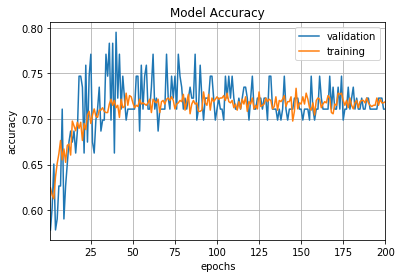

83/83 [==============================] - 0s 182us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5852123599454581, 0.7108433763664889]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 2s - loss: 0.9678 - acc: 0.4048 - val_loss: 0.7320 - val_acc: 0.3855
Epoch 2/200
 - 0s - loss: 0.6803 - acc: 0.5646 - val_loss: 0.6471 - val_acc: 0.6506
Epoch 3/200
 - 0s - loss: 0.6704 - acc: 0.5965 - val_loss: 0.6492 - val_acc: 0.6506
Epoch 4/200
 - 0s - loss: 0.6699 - acc: 0.5965 - val_loss: 0.6475 - val_acc: 0.6506
Epoch 5/200
 - 0s - loss: 0.6694 - acc: 0.5965 - val_loss: 0.6470 - val_acc: 0.6506
Epoch 6/200
 - 0s - loss: 0.6682 - acc: 0.5965 - val_loss: 0.6472 - val_acc: 0.6506
Epoch 7/200
 - 0s - loss: 0.6670 - acc: 0.5965 - val_loss: 0.6457 - val_acc: 0.6506
Epoch 8/

Epoch 93/200
 - 0s - loss: 0.5778 - acc: 0.7217 - val_loss: 0.5988 - val_acc: 0.7349
Epoch 94/200
 - 0s - loss: 0.5775 - acc: 0.7244 - val_loss: 0.6026 - val_acc: 0.7470
Epoch 95/200
 - 0s - loss: 0.5821 - acc: 0.7190 - val_loss: 0.6038 - val_acc: 0.7470
Epoch 96/200
 - 0s - loss: 0.5797 - acc: 0.7204 - val_loss: 0.5988 - val_acc: 0.7349
Epoch 97/200
 - 0s - loss: 0.5798 - acc: 0.7204 - val_loss: 0.6020 - val_acc: 0.7349
Epoch 98/200
 - 0s - loss: 0.5783 - acc: 0.7217 - val_loss: 0.6008 - val_acc: 0.7349
Epoch 99/200
 - 0s - loss: 0.5763 - acc: 0.7230 - val_loss: 0.6163 - val_acc: 0.6867
Epoch 100/200
 - 0s - loss: 0.5803 - acc: 0.7230 - val_loss: 0.6003 - val_acc: 0.7349
Epoch 101/200
 - 0s - loss: 0.5769 - acc: 0.7230 - val_loss: 0.6013 - val_acc: 0.7470
Epoch 102/200
 - 0s - loss: 0.5781 - acc: 0.7257 - val_loss: 0.5985 - val_acc: 0.7470
Epoch 103/200
 - 0s - loss: 0.5774 - acc: 0.7217 - val_loss: 0.6110 - val_acc: 0.6867
Epoch 104/200
 - 0s - loss: 0.5767 - acc: 0.7230 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.5712 - acc: 0.7190 - val_loss: 0.5979 - val_acc: 0.7229
Epoch 190/200
 - 0s - loss: 0.5748 - acc: 0.7204 - val_loss: 0.5978 - val_acc: 0.7349
Epoch 191/200
 - 0s - loss: 0.5724 - acc: 0.7190 - val_loss: 0.5978 - val_acc: 0.7349
Epoch 192/200
 - 0s - loss: 0.5744 - acc: 0.7137 - val_loss: 0.5928 - val_acc: 0.7349
Epoch 193/200
 - 0s - loss: 0.5765 - acc: 0.7111 - val_loss: 0.5927 - val_acc: 0.7349
Epoch 194/200
 - 0s - loss: 0.5730 - acc: 0.7124 - val_loss: 0.5975 - val_acc: 0.7349
Epoch 195/200
 - 0s - loss: 0.5738 - acc: 0.7190 - val_loss: 0.6009 - val_acc: 0.7349
Epoch 196/200
 - 0s - loss: 0.5724 - acc: 0.7217 - val_loss: 0.5945 - val_acc: 0.7590
Epoch 197/200
 - 0s - loss: 0.5713 - acc: 0.7244 - val_loss: 0.5991 - val_acc: 0.7229
Epoch 198/200
 - 0s - loss: 0.5740 - acc: 0.7204 - val_loss: 0.6007 - val_acc: 0.7349
Epoch 199/200
 - 0s - loss: 0.5713 - acc: 0.7150 - val_loss: 0.5955 - val_acc: 0.7590
Epoch 200/200
 - 0s - loss: 0.5725 - acc: 0.7257 - val

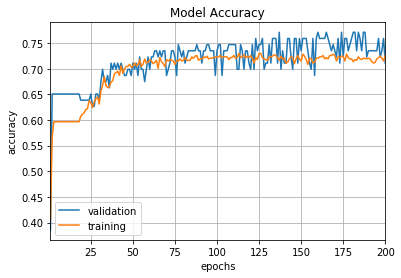

83/83 [==============================] - 0s 83us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6093955126153418, 0.7108433763664889]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------




In [13]:
batch_size = 10
num_classes = 2
epochs = 200

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.sparse_categorical_crossentropy,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [14]:
print("accuracy")
best__acc_score = 0.0
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    if(i>best__acc_score):
        best__acc_score = i
    avg_accuracy_score += i

print(best__acc_score)
print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

accuracy
0.7296937435032048
0.7211552604479732


[0.7133333345254262,
 0.7240000009536743,
 0.7213333340485891,
 0.7173333342870076,
 0.7203728369326788,
 0.725699067909454,
 0.7150466036542595,
 0.7296937435032048,
 0.7190412782956058,
 0.7256990703698322]

In [15]:
print("validation ")
print(best_score)

#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

validation 
0.7469879582703832
0.6835484804261777


[[0.5285170731090364, 0.7380952324186053],
 [0.6546908106122699, 0.5952380923997789],
 [0.6219150395620436, 0.6666666666666666],
 [0.6125593242191133, 0.6547619104385376],
 [0.5869242688977575, 0.7108433749302324],
 [0.6934708119874977, 0.6506024038935282],
 [0.555686090725014, 0.7469879582703832],
 [0.5858443020338036, 0.6506024125110672],
 [0.5852123599454581, 0.7108433763664889],
 [0.6093955126153418, 0.7108433763664889]]

In [16]:
kfold_validation_score_store

[[0.5285170731090364, 0.7380952324186053],
 [0.6546908106122699, 0.5952380923997789],
 [0.6219150395620436, 0.6666666666666666],
 [0.6125593242191133, 0.6547619104385376],
 [0.5869242688977575, 0.7108433749302324],
 [0.6934708119874977, 0.6506024038935282],
 [0.555686090725014, 0.7469879582703832],
 [0.5858443020338036, 0.6506024125110672],
 [0.5852123599454581, 0.7108433763664889],
 [0.6093955126153418, 0.7108433763664889]]